In [2]:
import qutip
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [3]:
no_cav = 3
cav_dim = 3

g = 1                #gamma
rg = g**0.5
rg = 1

In [34]:
t_final = 10
res = 500
step = t_final/res
c_time = np.arange(0, t_final, step)

c = qutip.destroy(2)
H = qutip.qeye(2)
psi_0 = qutip.fock(2,1)

In [49]:
corel = qutip.correlation_2op_2t(H, psi_0, c_time, c_time, [rg*c, 0.7*qutip.sigmaz()], c.dag(), c)
#corel_2 = qutip.correlation_2op_2t(H, psi_0, c_time, c_time, [rg*c,], c.dag(), c, reverse=True)

In [50]:
#result = qutip.mesolve(H, psi_0, np.arange(0, 2*t_final, step), [rg*c,], [qutip.fock_dm(2,1), ], )  
result = qutip.mesolve(H, psi_0, np.arange(0, 2*t_final, step), [rg*c,0.7*qutip.sigmaz()],  )  

In [51]:
n_mat = qutip.fock_dm(2,1).full()

In [52]:
expect_list = list()
for i in range(res*2):
    expect_list.append( np.trace(result.states[i].full() @ n_mat)   )


In [53]:
sigmaee_t = np.zeros_like(corel)
sigmaee_t_tau = np.zeros_like(corel)

x_dim, y_dim = corel.shape
#t, tau
for i in range(y_dim):
    #sigmaee_t[:,i] =  result.expect[0][:x_dim]
    #sigmaee_t_tau[:,i] = result.expect[0][i:i+x_dim]
    sigmaee_t[:,i] =  expect_list[:x_dim]
    sigmaee_t_tau[:,i] = expect_list[i:i+x_dim]

In [54]:
dt = c_time[1]

In [55]:
p_34_denom = sigmaee_t*sigmaee_t_tau

G_t_tau = (p_34_denom) - ((corel)**2)
G_t_tau *= 0.5  

#p_34_denom = [dt*sum(i) for i in p_34_denom.T]
#p_34_denom = dt*sum(p_34_denom)


In [42]:
#plt.plot([sum(i) for i in sigmaee_t.T])
#plt.plot(c_time, sigmaee_t.T[0])

#plt.plot
#sum((sigmaee_t.T)[0])
#plt.plot(([sum(i) for i in sigmaee_t_tau.T]))
#plt.plot(([sum(i) for i in (corel**2).T]), 'o')
#plt.plot(([sum(i) for i in ((sigmaee_t_tau*sigmaee_t)).T]))
#plt.plot(([sum(i) for i in ((sigmaee_t_tau*sigmaee_t) - corel**2).T]))

In [56]:
t_int = [dt*sum(i) for i in G_t_tau.T]

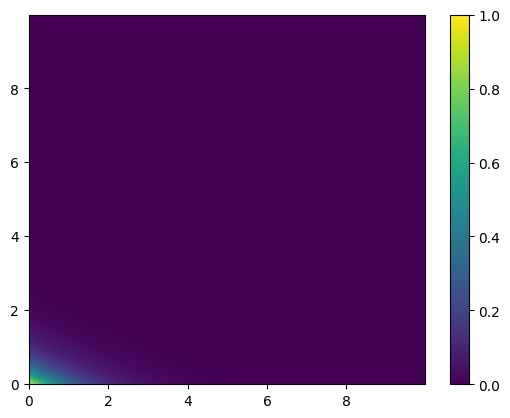

In [57]:
plt.pcolor(c_time, c_time, np.real(sigmaee_t*sigmaee_t_tau))
plt.colorbar()

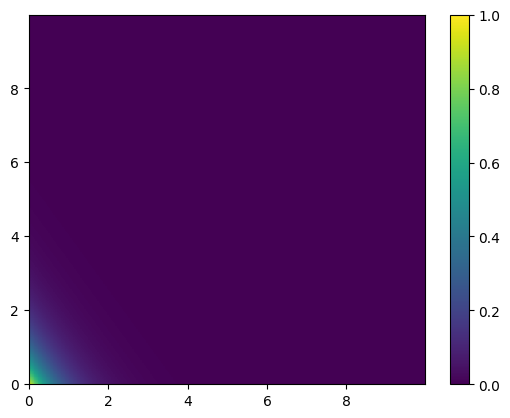

In [58]:
plt.pcolor(c_time, c_time, np.real(corel))
plt.colorbar()

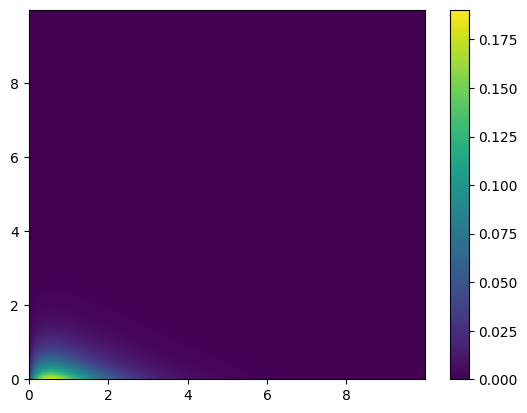

In [59]:
plt.pcolor(c_time, c_time, 0.5*np.real(sigmaee_t*sigmaee_t_tau) - 0.5*np.real(corel**2))
plt.colorbar()

In [60]:
term_

NameError: name 'term_' is not defined

In [ ]:
list_A = [np.real(sum(i))*10 for (i) in (corel**2).T]
list_A = np.array(list_A)
list_B = [sum(i)*10 for i in (sigmaee_t*sigmaee_t_tau).T]
list_B = np.array(list_B)

In [61]:
plt.plot(list_A-list_B)
#plt.plot(list_B)
#plt.yscale("log")

NameError: name 'list_A' is not defined

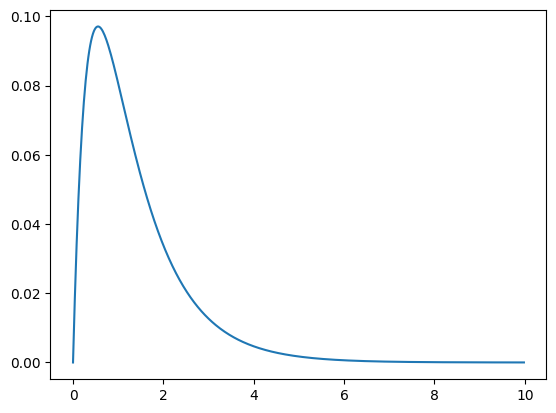

In [62]:
plt.plot(c_time, t_int)


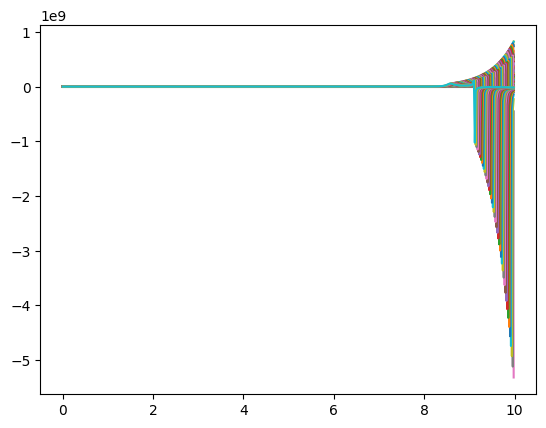

In [48]:
plt.plot(c_time, t_int/p_34_denom)


/Users/ygup3491/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


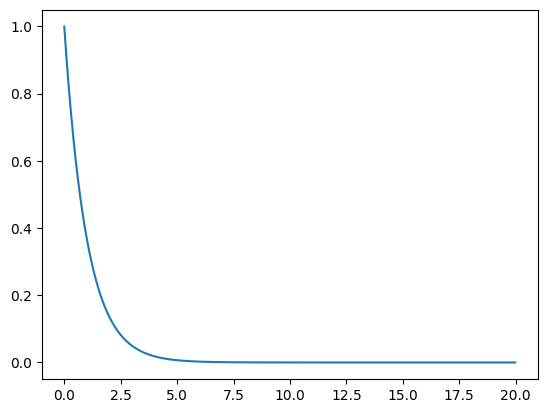

In [597]:
plt.plot(np.arange(0.000001, 2*t_final, step), expect_list)